In [1]:
import pandas as pd

In [2]:
directors = pd.read_csv('directors.csv').set_index('story_number')
directors

,director
story_number,
157,Keith Boak
158,Euros Lyn
159,Euros Lyn
160a,Keith Boak
160b,Keith Boak
...,...
297b,Jamie Magnus Stone
297c,Azhur Saleem
297d,Jamie Magnus Stone


In [3]:
# episodes = pd.read_csv('episodes.csv').astype('str')
# episodes

In [3]:
writers = pd.read_csv('writers.csv').set_index('story_number')
writers

,writer
story_number,
157,Russell T Davies
158,Russell T Davies
159,Mark Gatiss
160a,Russell T Davies
160b,Russell T Davies
...,...
297c,Chris Chibnall
297d,Chris Chibnall
297d,Maxine Alderton


In [5]:
# imdb = pd.read_csv('imdb.csv')
# imdb

In [4]:
dir_writer = directors.join(writers)
dir_writer

,director,writer
story_number,,
157,Keith Boak,Russell T Davies
158,Euros Lyn,Russell T Davies
159,Euros Lyn,Mark Gatiss
160a,Keith Boak,Russell T Davies
160b,Keith Boak,Russell T Davies
...,...,...
297c,Azhur Saleem,Chris Chibnall
297d,Jamie Magnus Stone,Chris Chibnall
297d,Jamie Magnus Stone,Maxine Alderton


In [5]:
dw_dummy = pd.crosstab(index=dir_writer['director'], 
                       columns = dir_writer['writer'],
                       margins=True)
dw_dummy = dw_dummy.T

In [6]:

# dw_dummy['w_sum'] = dw_dummy.sum(axis=1)
# dw_dummy
dw_dummy = dw_dummy.sort_values(by='All', ascending=False, axis=0).sort_values(by='All', ascending=False, axis=1).drop('All', axis=1).drop('All', axis=0)
dw_dummy

director,Graeme Harper,Euros Lyn,Jamie Magnus Stone,Douglas Mackinnon,James Strong,Rachel Talalay,Daniel Nettheim,Charles Palmer,Nick Hurran,Joe Ahearne,...,Peter Hoar,Brian Grant,Colm McCarthy,Richard Senior,Sheree Folkson,Stephen Woolfenden,Steve Hughes,Andy Goddard,Mat King,Dan Zeff
writer,,,,,,,,,,,,,,,,,,,,,
Steven Moffat,0,3,0,3,0,7,3,0,3,0,...,1,0,1,1,0,0,0,0,0,0
Russell T Davies,7,5,0,0,3,0,0,1,0,3,...,0,1,0,0,0,0,0,1,0,1
Chris Chibnall,1,0,7,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Mark Gatiss,0,2,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Toby Whithouse,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
Gareth Roberts,1,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
Peter Harness,0,0,0,0,0,0,3,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Helen Raynor,0,0,0,2,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Jamie Mathieson,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


<AxesSubplot:xlabel='director', ylabel='writer'>

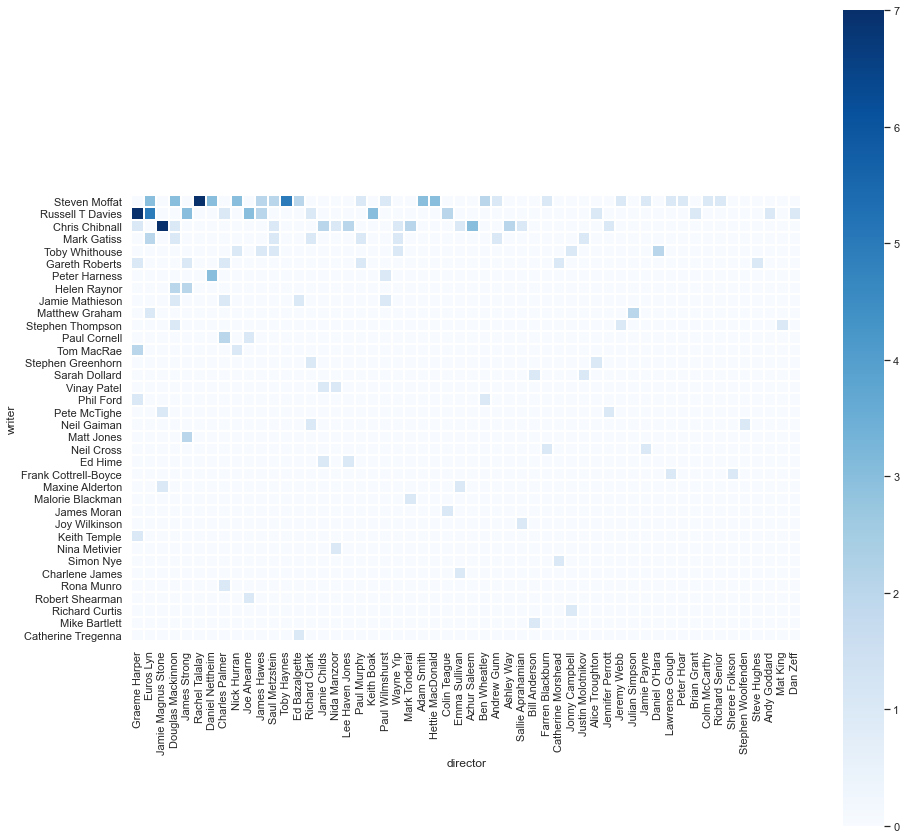

In [11]:
import seaborn as sns
%matplotlib inline

sns.set(rc={'figure.figsize':(15, 15)})

sns.heatmap(dw_dummy, square=True, cmap='Blues', linewidths=0.1, 
            xticklabels=True, yticklabels=True)

In [12]:
dir_writer.groupby(['director', 'writer']).size().nlargest(20)

director            writer          
Graeme Harper       Russell T Davies    7
Jamie Magnus Stone  Chris Chibnall      7
Rachel Talalay      Steven Moffat       7
Euros Lyn           Russell T Davies    5
Toby Haynes         Steven Moffat       5
Adam Smith          Steven Moffat       3
Azhur Saleem        Chris Chibnall      3
Daniel Nettheim     Peter Harness       3
                    Steven Moffat       3
Douglas Mackinnon   Steven Moffat       3
Euros Lyn           Steven Moffat       3
Hettie MacDonald    Steven Moffat       3
James Strong        Russell T Davies    3
Joe Ahearne         Russell T Davies    3
Keith Boak          Russell T Davies    3
Nick Hurran         Steven Moffat       3
Ashley Way          Chris Chibnall      2
Ben Wheatley        Steven Moffat       2
Charles Palmer      Paul Cornell        2
Colin Teague        Russell T Davies    2
dtype: int64

In [17]:
dw_dummy.shape

(36, 54)

In [18]:
ds = dw_dummy.columns.to_list()
ws = dw_dummy.index.to_list()
dir_writer

,director,writer
story_number,,
157,Keith Boak,Russell T Davies
158,Euros Lyn,Russell T Davies
159,Euros Lyn,Mark Gatiss
160a,Keith Boak,Russell T Davies
160b,Keith Boak,Russell T Davies
...,...,...
297c,Azhur Saleem,Chris Chibnall
297d,Jamie Magnus Stone,Chris Chibnall
297d,Jamie Magnus Stone,Maxine Alderton


In [19]:
import networkx as nx

G = nx.from_pandas_edgelist(dir_writer, 'director', 'writer')
# len(G.nodes())
# G.edges()

In [41]:
# for node, data in G.nodes(data=True):
#     if node in ds:
#         G[node]['director'] = 1
roles = {node: '#bc5090' if node in ds else '#ffa600' for node in G.nodes()}
nx.set_node_attributes(G, roles, 'color')
# G.nodes(data=True)

In [42]:
node_degree = dict(nx.degree(G))
min_size = 10
node_degree = {name:d+min_size for name, d in node_degree.items()}
nx.set_node_attributes(G, name='degree', values=node_degree)

In [45]:

from bokeh.io import output_file, show
from bokeh.models import (LabelSet, ResetTool, BoxZoomTool, ColumnDataSource, BoxSelectTool, Circle, 
                          EdgesAndLinkedNodes, HoverTool,
                          MultiLine, NodesAndLinkedEdges, Plot, Range1d, TapTool)
from bokeh.transform import linear_cmap
from bokeh.palettes import Spectral4
from bokeh.plotting import from_networkx

# G=nx.karate_club_graph()

plot = Plot(width=1000, height=1000,
            x_range=Range1d(-1, 1), y_range=Range1d(-1, 1))

plot.title.text = "CorrelAid_tidytuesday: Doctor Who Directors & Writers, size ~ degree"

plot.add_tools(HoverTool(tooltips=None), TapTool(), BoxSelectTool(), BoxZoomTool(), ResetTool())

graph_renderer = from_networkx(G, nx.spring_layout, scale=1, center=(0,0))

# graph_renderer.node_renderer.glyph = Circle(size=15, fill_color=Spectral4[0])
graph_renderer.node_renderer.glyph = Circle(size='degree', 
                                            fill_color='color')
#                                             linear_cmap('role', 'Spectral8', 
#                                                                    min(G.nodes()), 
#                                                                    max(G.nodes())
#                                                                   )
#                                            )
graph_renderer.node_renderer.selection_glyph = Circle(size=15, fill_color=Spectral4[2])
graph_renderer.node_renderer.hover_glyph = Circle(size=15, fill_color=Spectral4[1])

graph_renderer.edge_renderer.glyph = MultiLine(line_color="#CCCCCC", line_alpha=0.8, line_width=5)
graph_renderer.edge_renderer.selection_glyph = MultiLine(line_color=Spectral4[2], line_width=5)
graph_renderer.edge_renderer.hover_glyph = MultiLine(line_color=Spectral4[1], line_width=5)

graph_renderer.selection_policy = NodesAndLinkedEdges()
graph_renderer.inspection_policy = EdgesAndLinkedNodes()
plot.renderers.append(graph_renderer)

x, y = zip(*graph_renderer.layout_provider.graph_layout.values())
node_labels = list(G.nodes())
source = ColumnDataSource({'x': x, 'y': y, 'name': [node_labels[i] for i in range(len(x))]})
labels = LabelSet(x='x', y='y', text='name', source=source, background_fill_color='white', text_font_size='10px', background_fill_alpha=.7)
plot.renderers.append(labels)

output_file("correlaid_tidytuesday_doctorwho.html")
show(plot)

In [33]:
dir_writer[dir_writer.director == 'Bill Anderson']

,director,writer
story_number,,
267,Bill Anderson,Sarah Dollard
268,Bill Anderson,Mike Bartlett
